In [1]:
from warnings import filterwarnings
filterwarnings ('ignore')

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('train_titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
m=df.isna().sum()
m[m>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [6]:
df.duplicated().sum()

0

separate x and y

In [7]:
x=df.drop(columns=['PassengerId','Name','Ticket','Cabin','Survived'])
y=df[['Survived']]

In [9]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [10]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


cat and con separation of x

In [11]:
cat=list(x.columns[x.dtypes=='object'])
con=list(x.columns[x.dtypes!='object'])

In [12]:
 cat

['Sex', 'Embarked']

In [13]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

creating preprocessing pipeline

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [17]:
num_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='median')),('scaler',StandardScaler())])
cat_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),('ohe',OneHotEncoder(handle_unknown='ignore',sparse_output=False))])
pre=ColumnTransformer([('num',num_pipe,con),('cat',cat_pipe,cat)]).set_output(transform='pandas')

In [18]:
x_pre=pre.fit_transform(x)
x_pre

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.0,1.0,0.0,0.0,1.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,1.0,0.0,1.0,0.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0,0.0,1.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,1.0,0.0,0.0,0.0,1.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,-0.369365,-0.181487,-0.474545,-0.473674,-0.386671,0.0,1.0,0.0,0.0,1.0
887,-1.566107,-0.796286,-0.474545,-0.473674,-0.044381,1.0,0.0,0.0,0.0,1.0
888,0.827377,-0.104637,0.432793,2.008933,-0.176263,1.0,0.0,0.0,0.0,1.0
889,-1.566107,-0.258337,-0.474545,-0.473674,-0.044381,0.0,1.0,1.0,0.0,0.0


train test split

In [19]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_pre,y,test_size=0.3,random_state=42)

In [20]:
xtrain.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
445,-1.566107,-1.949034,-0.474545,2.008933,0.999770,0.0,1.0,0.0,0.0,1.0
650,0.827377,-0.104637,-0.474545,-0.473674,-0.489442,0.0,1.0,0.0,0.0,1.0
172,0.827377,-2.179583,0.432793,0.767630,-0.424256,1.0,0.0,0.0,0.0,1.0
450,-0.369365,0.510161,0.432793,2.008933,-0.089684,0.0,1.0,0.0,0.0,1.0
314,-0.369365,1.048110,0.432793,0.767630,-0.119886,0.0,1.0,0.0,0.0,1.0


In [22]:
ytrain.head()

,Survived
445,1
650,0
172,1
450,0
314,0


algorithm evaluation

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [24]:
dct={'Logistic':LogisticRegression(),
     'Decision Tree':DecisionTreeClassifier(),
     'Random Forest':RandomForestClassifier(),
     'Gradient Boost':GradientBoostingClassifier(),
     'KNN':KNeighborsClassifier(),
     'SVM':SVC()}

In [25]:
dct.items()

dict_items([('Logistic', LogisticRegression()), ('Decision Tree', DecisionTreeClassifier()), ('Random Forest', RandomForestClassifier()), ('Gradient Boost', GradientBoostingClassifier()), ('KNN', KNeighborsClassifier()), ('SVM', SVC())])

fit the model and evaluate the result

In [26]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [28]:
tr=[]
tr_cv=[]
ts=[]
for name,model in dct.items():
    # fit the model
    model.fit(xtrain,ytrain)
    # Predict results of train and test
    ypred_tr=model.predict(xtrain)
    ypred_ts=model.predict(xtest)
    # calculate f1 score in train and test
    f1_tr=f1_score(ytrain,ypred_tr)
    f1_ts=f1_score(ytest,ypred_ts)
    # 5 fold cross calidation on training
    scores=cross_val_score(model,xtrain,ytrain,cv=5,scoring='f1_macro')
    f1_cv=scores.mean()
    # append above result in tr,tr_cv,ts
    tr.append(f1_tr)
    ts.append(f1_ts)
    tr_cv.append(f1_cv)
    # print above result for each model
    print(f'Model name:{name}\n')
    print(f'train f1:{f1_tr:.4f}')
    print(f'train f1 cross val:{f1_cv:.4f}')
    print(f'test f1:{f1_ts:.4f}')
    print('\n======================================================\n')

Model name:Logistic

train f1:0.7133
train f1 cross val:0.7786
test f1:0.7606


Model name:Decision Tree

train f1:0.9735
train f1 cross val:0.7432
test f1:0.6933


Model name:Random Forest

train f1:0.9736
train f1 cross val:0.7759
test f1:0.7273


Model name:Gradient Boost

train f1:0.8638
train f1 cross val:0.7994
test f1:0.7363


Model name:KNN

train f1:0.7872
train f1 cross val:0.7696
test f1:0.7228


Model name:SVM

train f1:0.7721
train f1 cross val:0.7999
test f1:0.7707




save above result to dataframe

In [29]:
dct

{'Logistic': LogisticRegression(),
 'Decision Tree': DecisionTreeClassifier(),
 'Random Forest': RandomForestClassifier(),
 'Gradient Boost': GradientBoostingClassifier(),
 'KNN': KNeighborsClassifier(),
 'SVM': SVC()}

In [30]:
dct.keys()

dict_keys(['Logistic', 'Decision Tree', 'Random Forest', 'Gradient Boost', 'KNN', 'SVM'])

In [34]:
list(dct.keys())

['Logistic', 'Decision Tree', 'Random Forest', 'Gradient Boost', 'KNN', 'SVM']

In [35]:
result_dct={'Model_name':list(dct.keys()),
            'Train F1': tr,
            'Test F1': ts,
            'Test F1 CV': tr_cv}

In [36]:
results_df=pd.DataFrame(result_dct)
results_df

,Model_name,Train F1,Test F1,Test F1 CV
0,Logistic,0.713318,0.760563,0.778578
1,Decision Tree,0.973451,0.693333,0.743226
2,Random Forest,0.973568,0.727273,0.775891
3,Gradient Boost,0.863850,0.736318,0.799417
4,KNN,0.787185,0.722772,0.769576
5,SVM,0.772093,0.770732,0.799933


In [40]:
results_df=results_df.sort_values(by='Test F1', ascending=False)

In [41]:
results_df

,Model_name,Train F1,Test F1,Test F1 CV
5,SVM,0.772093,0.770732,0.799933
0,Logistic,0.713318,0.760563,0.778578
3,Gradient Boost,0.863850,0.736318,0.799417
2,Random Forest,0.973568,0.727273,0.775891
4,KNN,0.787185,0.722772,0.769576
1,Decision Tree,0.973451,0.693333,0.743226


CREATE THE SVM MODEL

In [45]:
best_model=SVC(probability=True)
best_model.fit(xtrain,ytrain)

SVC(probability=True)

In [46]:
best_model.score(xtrain,ytrain)

0.8426966292134831

In [47]:
best_model.score(xtest,ytest)

0.8246268656716418

predicting the result for test and train

In [48]:
ypred_tr=best_model.predict(xtrain)

In [49]:
ypred_ts=best_model.predict(xtest)

In [50]:
ypred_tr[0:5]

array([1, 0, 1, 0, 0], dtype=int64)

In [51]:
ytrain.head()

,Survived
445,1
650,0
172,1
450,0
314,0


In [52]:
ypred_ts[0:5]

array([0, 0, 0, 1, 1], dtype=int64)

In [53]:
ytest.head()

,Survived
709,1
439,0
840,0
720,1
39,1


creat a confusion matrix

In [54]:
c=best_model.classes_
c

array([0, 1], dtype=int64)

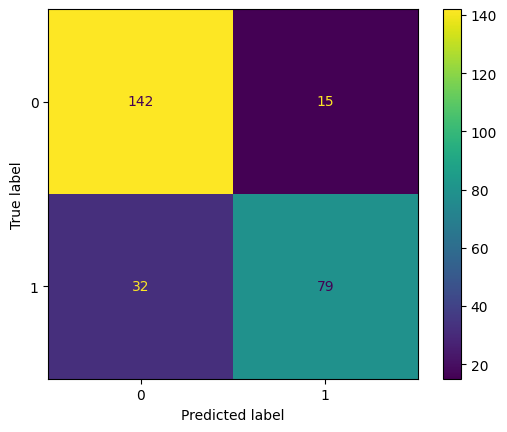

In [56]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf=confusion_matrix(ytest,ypred_ts)
cfd=ConfusionMatrixDisplay(cf,display_labels=c)
cfd.plot()

print classification report 

In [57]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       157
           1       0.84      0.71      0.77       111

    accuracy                           0.82       268
   macro avg       0.83      0.81      0.81       268
weighted avg       0.83      0.82      0.82       268



showing ROC AUC curve for both train andd test

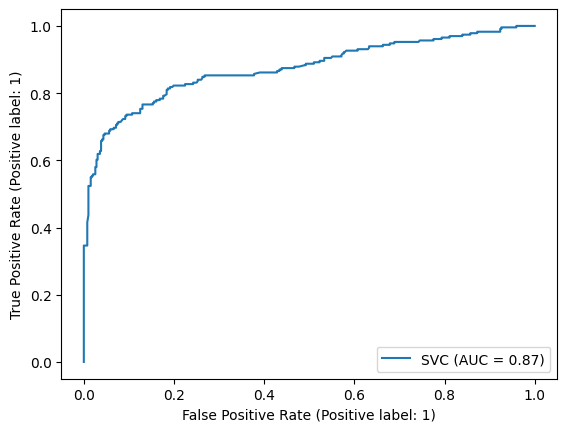

In [58]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(best_model,xtrain,ytrain)

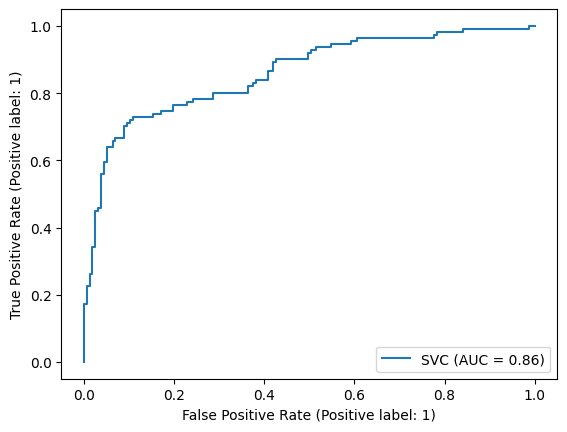

In [59]:
RocCurveDisplay.from_estimator(best_model,xtest,ytest)

cross validated ROc_AUC score

In [60]:
auc_score=cross_val_score(best_model,xtrain,ytrain,cv=5,scoring='roc_auc')
auc_score

array([0.78368794, 0.89928453, 0.79196478, 0.82720178, 0.85117057])

In [61]:
auc_score.mean()

0.8306619215201284

predicting out of sample data

In [63]:
xnew=pd.read_csv('test_titanic.csv')

In [64]:
xnew.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [65]:
xnew_pre=pre.transform(xnew)
xnew_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.827377,0.394887,-0.474545,-0.473674,-0.490783,0.0,1.0,0.0,1.0,0.0
1,0.827377,1.355510,0.432793,-0.473674,-0.507479,1.0,0.0,0.0,0.0,1.0
2,-0.369365,2.508257,-0.474545,-0.473674,-0.453367,0.0,1.0,0.0,1.0,0.0
3,0.827377,-0.181487,-0.474545,-0.473674,-0.474005,0.0,1.0,0.0,0.0,1.0
4,0.827377,-0.565736,0.432793,0.767630,-0.401017,1.0,0.0,0.0,0.0,1.0


predicting the survived

In [66]:
preds=best_model.predict(xnew_pre)
preds

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [68]:
best_model.classes_

array([0, 1], dtype=int64)

In [69]:
probs=best_model.predict_proba(xnew_pre)[:,1]
probs[0:5]

array([0.1497149 , 0.5       , 0.14187033, 0.1419607 , 0.51905333])

In [70]:
df_final=xnew[['PassengerId']]
df_final

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [71]:
df_final['Survived_pred']=preds
df_final['Survived_prob']=probs
df_final

,PassengerId,Survived_pred,Survived_prob
0,892,0,0.149715
1,893,1,0.500000
2,894,0,0.141870
3,895,0,0.141961
4,896,1,0.519053
...,...,...,...
413,1305,0,0.142622
414,1306,1,0.871905
415,1307,0,0.150285
416,1308,0,0.142622


In [72]:
df_final.to_csv('algoevaluation.csv',index=False)

<Axes: title={'center': 'survived people'}, xlabel='Survived_pred'>

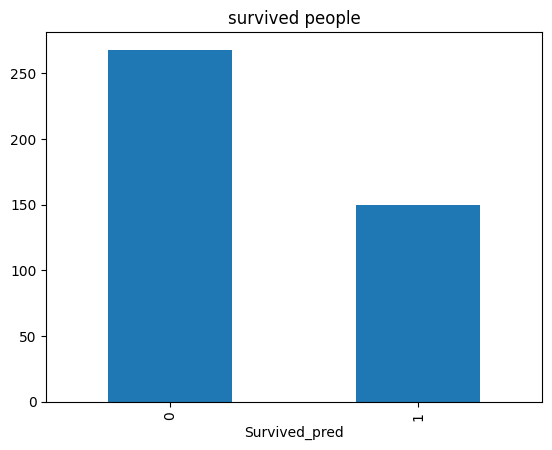

In [73]:
df_final['Survived_pred'].value_counts().plot(kind='bar',title='survived people')